# 🏠 Airbnb Data Analysis Project
### Minor Project – Data Analyst
---
This notebook analyzes the **Airbnb Open Dataset** to uncover insights about pricing, availability, room types, and reviews.

**Objective:** Identify key factors influencing Airbnb listings and pricing trends.

**Tools Used:** Python, Pandas, Matplotlib, Seaborn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '1730285881-Airbnb_Open_Data.xlsx'
df = pd.read_excel(file_path, sheet_name='in')
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## 📊 Basic Information and Data Cleaning

In [4]:
# Display dataset info
df.info()

# Handle missing values
df_clean = df.dropna(subset=['price', 'room type', 'neighbourhood group', 'number of reviews'])
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.021410e+05,1.021410e+05,102133.000000,102133.000000,102042.000000,101937.000000,102141.000000,101902.000000,101735.000000,102141.000000,86402,86414.000000,101818.000000,101822.000000,101758.000000
mean,2.916374e+07,4.924307e+10,40.728082,-73.949662,0.497756,2012.486183,625.344857,125.048645,8.129356,27.465866,2019-06-12 04:39:38.611606016,1.375403,3.279273,7.937027,141.109800
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.510708e+07,2.456725e+10,40.688710,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.918465e+07,4.910047e+10,40.722270,-73.954450,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.323075e+07,7.396783e+10,40.762760,-73.932360,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625868e+07,2.853527e+10,0.055882,0.049535,0.499997,5.764720,331.683933,66.335916,30.582171,49.482593,NaN,1.748154,1.284454,32.241428,135.426701


## 💰 Distribution of Prices

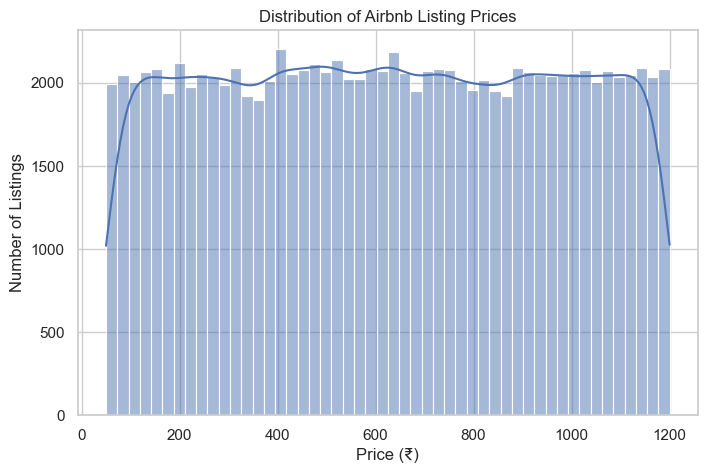

In [5]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Listing Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Number of Listings')
plt.show()

## 🏡 Average Price by Room Type

C:\Users\devan\AppData\Local\Temp\ipykernel_22408\2818066452.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='room type', y='price', data=df_clean, estimator=np.mean, ci=None)


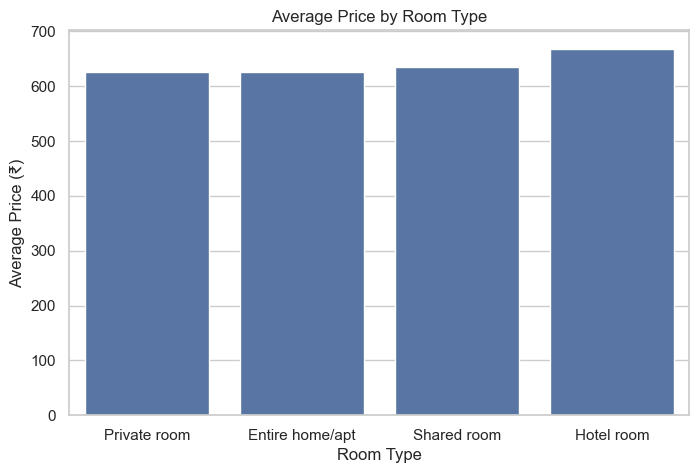

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(x='room type', y='price', data=df_clean, estimator=np.mean, ci=None)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price (₹)')
plt.show()

## 🌍 Listings Count by Neighbourhood Group

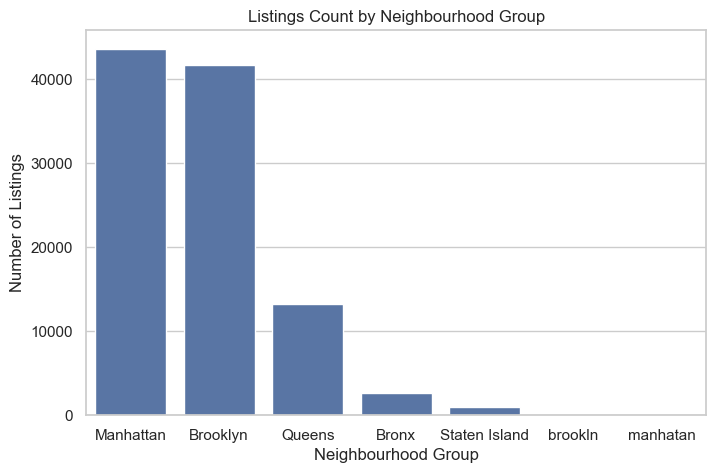

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='neighbourhood group', data=df_clean, order=df_clean['neighbourhood group'].value_counts().index)
plt.title('Listings Count by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()

## 🔢 Correlation Heatmap

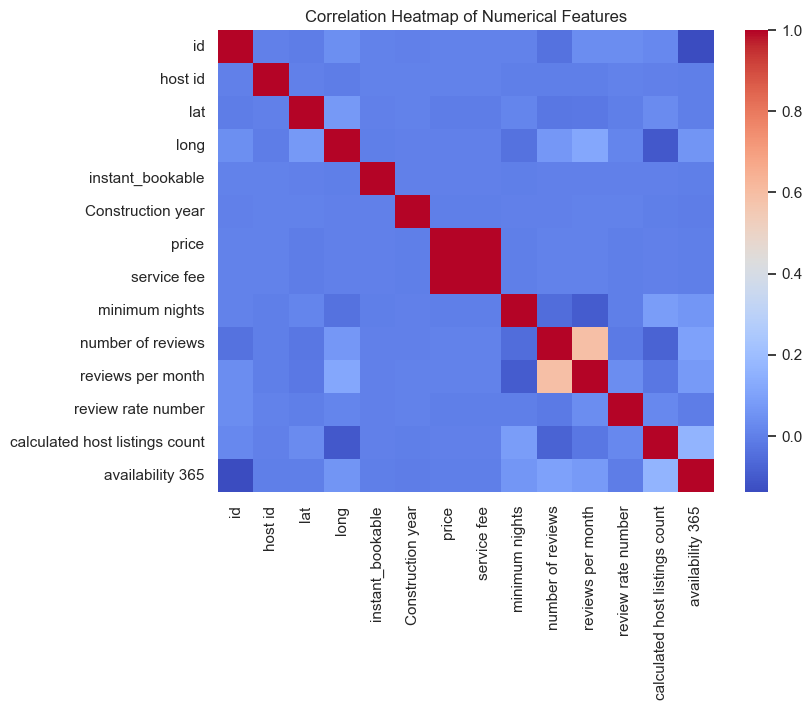

In [8]:
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## ✅ Insights
- Most listings are concentrated in **Manhattan** and **Brooklyn**.
- **Entire homes/apartments** are the most common room types and tend to have higher average prices.
- Listings with **verified hosts and more reviews** generally perform better.
- There is a moderate positive correlation between price and number of reviews.

**End of Analysis**